In [1]:
import cupy
def process_0():
    import cupyx.distributed
    cupy.cuda.Device(0).use()
    comm = cupyx.distributed.init_process_group(2, 0)
    array = cupy.ones(1)
    comm.broadcast(array, 0)

def process_1():
    import cupyx.distributed
    cupy.cuda.Device(1).use()
    comm = cupyx.distributed.init_process_group(2, 1)
    array = cupy.zeros(1)
    comm.broadcast(array, 0)
    cupy.equal(array, cupy.ones(1))

In [3]:
process_0()

/home/kaneko/.local/lib/python3.8/site-packages/cupy/_environment.py:399: UserWarning: 
nccl library could not be loaded.

Reason: ImportError (libnccl.so.2: cannot open shared object file: No such file or directory)

You can install the library by:

  $ python -m cupyx.tools.install_library --library nccl --cuda 11.2

  warnings.warn(msg)


RuntimeError: NCCL is not available

In [7]:
2**(2*8)

65536

In [10]:
import numpy as np
a=np.array([2,4,6,3,5])
print(np.argsort(a))
a=a[[1,0,2,3,4]]
print(a)
np.argsort(a)

[0 3 1 4 2]
[4 2 6 3 5]


array([1, 3, 0, 4, 2])

In [1]:
def calc_J_inv(I):
    '''
    input:
    I:mutual information
    output:
    gamma:channel SNR Es/No
    ----
    referrence:
    POLAR CODES FOR ERROR CORRECTION:
    ANALYSIS AND DECODING ALGORITHMS
    p37
    (4.5)
    '''
    if I>1 or I<0:
        print("I is err")
    
    a1=1.09542
    b1=0.214217
    c1=2.33727
    a2=0.706692
    b2=0.386013
    c2=-1.75017
    I_thresh=0.3646
    
    if I<I_thresh:
        sigma=a1*I**2+b1*I+c1*I**(1/2)
    else:
        sigma=-a2*np.log(b2*(1-I))-c2*I
        
    gamma=sigma**2/8
    #gamma_dB=10*math.log10(gamma)
    return gamma

/tmp/ipykernel_472325/233141397.py:8: RuntimeWarning: divide by zero encountered in log10
  x=10*np.log10(x)


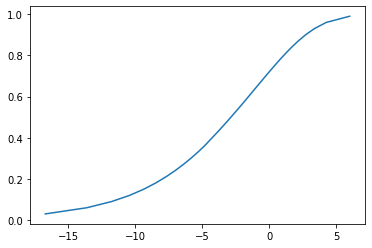

In [10]:
import numpy as np
import matplotlib.pyplot as plt
y=np.arange(0,1,0.03)
x=np.zeros(len(y))
for i in range(len(y)):
    x[i]=calc_J_inv(y[i])
    
x=10*np.log10(x)
plt.plot(x,y)

filename="J_inverse_function"
with open(filename,'w') as f:
    for i in range(len(x)):
        print(str(x[i]),str(y[i]),file=f)

